In [83]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch
import dgl
from dgl.data import QM9EdgeDataset

from visualizer import draw_plotly

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
data = QM9EdgeDataset(label_keys=['mu'])

Done loading data from cached files.


In [4]:
len(data)

130831

In [67]:
g, labels = data.__getitem__(100000)

In [6]:
draw_plotly(g)

In [106]:
from model import MoleculeMPNN

In [88]:
net = MoleculeMPNN()

In [51]:
### number of parameters ###
sum(p.numel() for p in net.parameters())

247937

In [110]:
labels

tensor([4.0399])

In [78]:
### Modified from https://docs.dgl.ai/en/0.2.x/tutorials/basics/4_batch.html ### 
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    labels = torch.row_stack(labels)
    return batched_graph, labels

In [95]:
train_dataset = torch.utils.data.Subset(data,range(10000))
valid_dataset = torch.utils.data.Subset(data,range(10000,11000))
test_dataset = torch.utils.data.Subset(data,range(20000,21000))

train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True, collate_fn=collate)
valid_dataloader = DataLoader(valid_dataset, batch_size=20, collate_fn=collate)
test_dataloader  = DataLoader(test_dataset,  batch_size=1, collate_fn=collate)

In [90]:
net(g)

tensor([[-0.1247]], grad_fn=<AddmmBackward0>)

In [91]:
from training import train_valid_loop

train_loss, valid_loss = train_valid_loop(net, train_dataloader, valid_dataloader, 60)

  0%|          | 0/60 [00:00<?, ?it/s]

Epoch:  0  Train loss:  2.3572858699560166  Valid loss:  1.2709197771549225
Epoch:  1  Train loss:  1.6969651147723197  Valid loss:  1.1035241532325744
Epoch:  2  Train loss:  1.5254307169914245  Valid loss:  1.075935541987419
Epoch:  3  Train loss:  1.4611416605114937  Valid loss:  1.255244265794754
Epoch:  4  Train loss:  1.4382637178897857  Valid loss:  1.3491672080755235
Epoch:  5  Train loss:  1.4312407625317574  Valid loss:  1.2844930559396743
Epoch:  6  Train loss:  1.3991810779869556  Valid loss:  1.010903885960579
Epoch:  7  Train loss:  1.3663708969354629  Valid loss:  0.9744100570678711
Epoch:  8  Train loss:  1.3544548386633397  Valid loss:  1.0387725150585174
Epoch:  9  Train loss:  1.348897396326065  Valid loss:  0.9772606456279754
Epoch:  10  Train loss:  1.3264543783068656  Valid loss:  1.0178258174657822
Epoch:  11  Train loss:  1.3183200879096986  Valid loss:  1.1398061800003052
Epoch:  12  Train loss:  1.291428287744522  Valid loss:  1.058983393907547
Epoch:  13  Tra

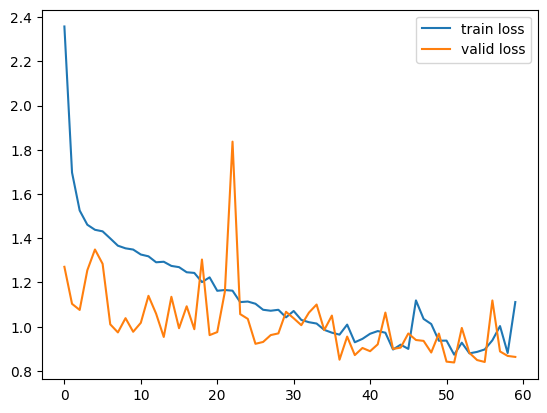

In [92]:
fig, axes = plt.subplots()
axes.plot(range(len(train_loss)),train_loss,label='train loss')
axes.plot(range(len(valid_loss)),valid_loss,label='valid loss')
#axes.set_yscale('log')
#axes.set_ylim([1e-2,1e0])
axes.legend()
plt.show()

In [107]:
preds, trues = [], []

for i in range(1000):
    g, labels = data.__getitem__(i)
    preds.append(net(g).detach().numpy().item())
    trues.append(labels.item())

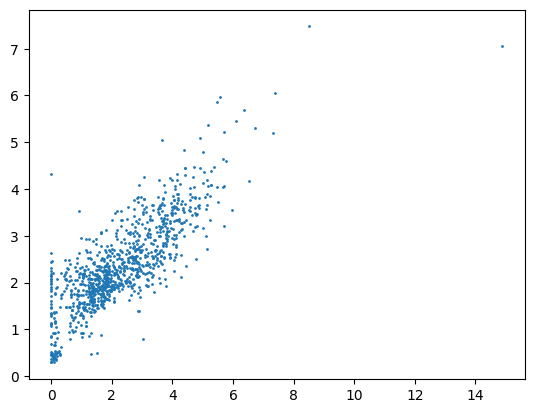

In [109]:
plt.scatter(trues,preds,s=1)